# Projekt

**Tema**  
Usporedba alata za označavanje teksta

**Studij**  
Preddiplomski studij informatike

# Uvod

Alati za označavanje teksta se koriste za izradu tekstualnih skupova podataka koji se zatim koriste u treniranju modela strojnog ili dubokog učenja. Postoje razni problemi u [obradi prirodnog jezika](https://en.wikipedia.org/wiki/Natural_language_processing) koji se mogu riješiti pomoću umjetne inteligencije: prepoznavanje imenovanih entiteta, klasifikacija teksta, analiza sentimenta, prepoznavanje dijelova rečenice (npr. prepoznavanje imenica, glagola i pridjeva u nekoj rečenici). U sklopu ovog projekta odlučio sam se fokusirati na zadatak **prepoznavanja imenovanih entiteta**.

[Prepoznavanje imenovanih entiteta](https://en.wikipedia.org/wiki/Named-entity_recognition) (*named entity recognition* ili skraćeno *NER*) je zadatak ekstrakcije informacija koji nastoji locirati i klasificirati imenovane entitete u nestrukturiranom tekstu. Imenovani entiteti mogu biti imena osoba, imena organizacija, geografske lokacije, količine, vremenski izrazi i slično. Prepoznavanje imenovanih entiteta ima veliku ulogu u sustavima za ekstrakciju informacija iz raznih dokumenata i tekstova.

# Opis i preuzimanje podataka (CoNLL-2003)

Podatke ćemo preuzeti sa https://deepai.org/dataset/conll-2003-english

**CoNLL-2003** je skup podataka za prepoznavanje imenovanih entiteta.

Primjer označene rečenice:  
**`[ORG U.N.]`** official **`[PER Ekeus]`** head for **`[LOC Baghdad]`**.

Gornja rečenica sadrži 3 imenovana entiteta: organizaciju (UN - United Nations), osobu (Ekeus - švedski diplomat Rolf Ekéus) i lokaciju (Baghdad).

CoNLL-2003 skup podataka sadrži 4 vrste imenovanih entiteta: osobe (PER), lokacije (LOC), organizacije (ORG) i "ostale" entitete (MISC). Svaka riječ u rečenici koja ne pripada nijednoj od tih kategorija označena je slovom O. 

Također, svaka od 4 vrste imenovanih entiteta ima 2 podkategorije ovisno o tome da li označava početak imenovanog entiteta ili se nalazi unutar njega.  

Primjer:  
**`[B-PER Joe]`** **`[I-PER Biden]`** is the President of the **`[B-LOC United]`** **`[I-LOC States]`**.  

U gornjoj rečenici imamo dva imenovana entiteta (*Joe Biden* i *United States*), no oni se sastoje od više riječi. Prefiks B- označava *početak* imenovanog entiteta, dok prefiks I- označava da se ta riječ nalazi *unutar* imenovanog entiteta.

Dakle, možemo zaključiti da u CoNLL-2003 skupu podataka imamo 9 vrsta oznaka:  

```
B-PER -> početak imena osobe
I-PER -> nastavak imena osobe
B-LOC -> početak geografske lokacije
I-LOC -> nastavak geografske lokacije
B-ORG -> početak imena organizacije
I-ORG -> nastavak imena organizacije
B-MISC -> početak "nerazvrstanog" entiteta
I-MISC -> nastavak "nerazvrstanog" entiteta
O -> oznaka za riječ koja nije entitet
```

Originalni znanstveni rad koji je predstavio ovaj skup podataka možemo pronaći na linku: https://arxiv.org/pdf/cs/0306050v1.pdf. Rečenice koje se nalaze u tom skupu podataka preuzete su iz novinskih članaka agencije [Reuters](https://en.wikipedia.org/wiki/Reuters) u razdoblju od 1996. do 1997. godine.

In [ ]:
# Preuzimanje podataka
!wget https://data.deepai.org/conll2003.zip

--2022-06-10 15:37:14--  https://data.deepai.org/conll2003.zip
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 982975 (960K) [application/x-zip-compressed]
Saving to: ‘conll2003.zip’

conll2003.zip       100%[===================>] 959.94K  2.05MB/s    in 0.5s    

2022-06-10 15:37:15 (2.05 MB/s) - ‘conll2003.zip’ saved [982975/982975]



# Vizualizacija podataka

In [ ]:
# Raspakiravanje .zip datoteke
import zipfile
zip_ref = zipfile.ZipFile("conll2003.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Funkcija za dohvaćanje linija teksta iz .txt datoteke
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
# Dohvaćanje linija teksta
train = get_lines("train.txt")
valid = get_lines("valid.txt")
test = get_lines("test.txt")

In [ ]:
print("Broj linija teksta u skupu za treniranje:", len(train))
print("Broj linija teksta u skupu za validaciju:", len(valid))
print("Broj linija teksta u skupu za testiranje:", len(test))

Broj linija teksta u skupu za treniranje: 219554
Broj linija teksta u skupu za validaciju: 55044
Broj linija teksta u skupu za testiranje: 50350


In [ ]:
# Prvih 30 linija teksta iz skupa za treniranje
train[:30]

['-DOCSTART- -X- -X- O\n',
 '\n',
 'EU NNP B-NP B-ORG\n',
 'rejects VBZ B-VP O\n',
 'German JJ B-NP B-MISC\n',
 'call NN I-NP O\n',
 'to TO B-VP O\n',
 'boycott VB I-VP O\n',
 'British JJ B-NP B-MISC\n',
 'lamb NN I-NP O\n',
 '. . O O\n',
 '\n',
 'Peter NNP B-NP B-PER\n',
 'Blackburn NNP I-NP I-PER\n',
 '\n',
 'BRUSSELS NNP B-NP B-LOC\n',
 '1996-08-22 CD I-NP O\n',
 '\n',
 'The DT B-NP O\n',
 'European NNP I-NP B-ORG\n',
 'Commission NNP I-NP I-ORG\n',
 'said VBD B-VP O\n',
 'on IN B-PP O\n',
 'Thursday NNP B-NP O\n',
 'it PRP B-NP O\n',
 'disagreed VBD B-VP O\n',
 'with IN B-PP O\n',
 'German JJ B-NP B-MISC\n',
 'advice NN I-NP O\n',
 'to TO B-PP O\n']

In [ ]:
# Zadnjih 20 linija teksta iz skupa za treniranje
train[-20:]

['on IN B-PP O\n',
 'Friday NNP B-NP O\n',
 ': : O O\n',
 '\n',
 'Division NN B-NP O\n',
 'two CD I-NP O\n',
 '\n',
 'Plymouth NN B-NP B-ORG\n',
 '2 CD I-NP O\n',
 'Preston NNP I-NP B-ORG\n',
 '1 CD I-NP O\n',
 '\n',
 'Division NN B-NP O\n',
 'three CD I-NP O\n',
 '\n',
 'Swansea NN B-NP B-ORG\n',
 '1 CD I-NP O\n',
 'Lincoln NNP I-NP B-ORG\n',
 '2 CD I-NP O\n',
 '\n']

Iz linija teksta u skupu za treniranje vidimo da su podaci strukturirani na sljedeći način:

* na početku dokumenta stoji oznaka `-DOCSTART-`
* početak nove (tj. kraj stare) rečenice je označen sa `\n`
* rečenice su podijeljene u riječi
* linija za svaku riječ sadrži samu riječ, part-of-speech tag, chunk tag i NER tag (to možemo pročitati u dijelu 2.3. [znanstvenog rada](https://arxiv.org/pdf/cs/0306050v1.pdf))

Nama je u sklopu ovog zadatka dovoljno imati samu riječ i NER tag koji označava o kojoj vrsti entiteta se radi.

# Priprema podataka

In [ ]:
# Funkcija za obradu podataka
def preprocess_text (text):
  
  preprocessed_lines = []
  sentence_num = -1

  for line in text:
    if line.startswith("-DOCSTART-"): # početak dokumenta preskačemo
      pass
    elif line == "\n": # kraj rečenice
      sentence_num += 1
    else: # obrada riječi (spremamo podatke u rječnik)
      line_data = {}
      line_split = line.split()
      line_data["word"] = line_split[0]
      line_data["label"] = line_split[-1]
      line_data["sentence_num"] = sentence_num
      preprocessed_lines.append(line_data)
  
  return preprocessed_lines

In [ ]:
# Obrada skupova za treniranje, validaciju i testiranje
preprocessed_train = preprocess_text(train)
preprocessed_valid = preprocess_text(valid)
preprocessed_test = preprocess_text(test)

In [ ]:
# Kreiranje DataFrame-ove za vizualizaciju obrađenih podataka
import pandas as pd
train_df = pd.DataFrame(preprocessed_train)
val_df = pd.DataFrame(preprocessed_valid)
test_df = pd.DataFrame(preprocessed_test)

# Prvih 20 riječi u skupu za treniranje
train_df.head(20)

,word,label,sentence_num
0,EU,B-ORG,0
1,rejects,O,0
2,German,B-MISC,0
3,call,O,0
4,to,O,0
5,boycott,O,0
6,British,B-MISC,0
7,lamb,O,0
8,.,O,0
9,Peter,B-PER,1


In [ ]:
# Koliki je ukupni broj riječi?
total_words = list(train_df["word"].values)
print(f"Ukupni broj riječi: {len(total_words)}")

Ukupni broj riječi: 203621


In [ ]:
# Koliko imamo jedinstvenih riječi i oznaka?
words = list(set(train_df["word"].values))
labels = list(set(train_df["label"].values))

num_words, num_labels = len(words), len(labels)

print(f"Broj jedinstvenih riječi: {num_words}")
print(f"Broj jedinstvenih oznaka: {num_labels}")

Broj jedinstvenih riječi: 23623
Broj jedinstvenih oznaka: 9


Kao što smo i očekivali, broj jedinstvenih oznaka je 9.

## Kreiranje liste rečenica

In [ ]:
# Funkcija koja prima DataFrame sličan gornjem i vraća listu rečenica
def get_sentences_list_from_df (df):

  sentences = []
  sentence = ""

  for index, row in df.iterrows():
    if index == 0:
      sentence += row["word"]
    elif row["sentence_num"] == df.iloc[index - 1]["sentence_num"]: # ista rečenica kao i prije
      sentence += " " + row["word"]
    else: # nova rečenica
      sentences.append(sentence)
      sentence = ""
      sentence += row["word"]
    
  return sentences

In [ ]:
# Kreiranje liste rečenica
train_sentences_list = get_sentences_list_from_df(train_df)
val_sentences_list = get_sentences_list_from_df(val_df)
test_sentences_list = get_sentences_list_from_df(test_df)

In [ ]:
# Prvih 5 rečenica u skupu za treniranje
for sent in train_sentences_list[:5]:
  print(sent if len(sent) < 140 else sent[:140] + "... (skraćeno)")

EU rejects German call to boycott British lamb .
Peter Blackburn
BRUSSELS 1996-08-22
The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whethe... (skraćeno)
Germany 's representative to the European Union 's veterinary committee Werner Zwingmann said on Wednesday consumers should buy sheepmeat fr... (skraćeno)


## Prosječna duljina rečenica

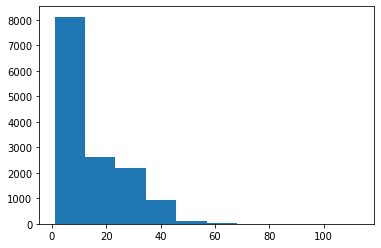

In [ ]:
# Vizualizacija duljina svih rečenica
import matplotlib.pyplot as plt
plt.hist([len(s.split()) for s in train_sentences_list], bins=10)
plt.show()

In [ ]:
# Kolika je prosječna duljina rečenica?

sum = 0

for sent in train_sentences_list:
  sum += len(sent.split())

print("Prosječna duljina rečenice:", sum / len(train_sentences_list))

Prosječna duljina rečenice: 14.502635327635328


In [ ]:
# Kolika duljina rečenica "pokriva" 95% svih duljina?

import numpy as np

sent_lens = []

for sent in train_sentences_list:
  sent_lens.append(len(sent.split()))

print(int(np.percentile(sent_lens, 95)))

37


95% svih rečenica ima duljinu manju od 37.

## Vektorizacija teksta

Vektorizacija teksta je proces pretvaranja teksta u numerički format. Keras sadrži sloj naziva `TextVectorization` pomoću kojeg možemo vektorizirati tekst.

In [ ]:
print(f"Broj jedinstvenih riječi: {num_words}")

Broj jedinstvenih riječi: 23623


Postaviti ćemo duljinu rečenica da bude jednaka 50 jer smo zaključili da to daje bolje rezultate od slučaja kada su duljine rečenica manje.

In [ ]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=23000, # maksimalni broj numeriranih riječi
                                    output_sequence_length=50) # duljina sekvenci će biti 50

Pozivanjem `.adapt()` metode nad objektom klase `TextVectorization` mapiramo svaku riječ iz skupa rečenica na neki broj.

In [ ]:
text_vectorizer.adapt(train_sentences_list)

Sada možemo koristiti taj objekt da bismo vektorizirali neku rečenicu.

In [ ]:
# Primjer vektorizacije rečenice
index = 0
sent = train_sentences_list[index]
vec_sent = text_vectorizer([sent])

print(f"Rečenica:\n{sent}")
print(f"\nVektorizirana rečenica:\n{vec_sent[0]}")
print(f"\nDuljina vektorizirane rečenice: {len(vec_sent[0])}")

Rečenica:
EU rejects German call to boycott British lamb .

Vektorizirana rečenica:
[  996 12747   203   618     5  4445   212  6495     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]

Duljina vektorizirane rečenice: 50


In [ ]:
# Vektorizacija svih rečenica
train_sentences_vectorized = [text_vectorizer([x]) for x in train_sentences_list]
val_sentences_vectorized = [text_vectorizer([x]) for x in val_sentences_list]
test_sentences_vectorized = [text_vectorizer([x]) for x in test_sentences_list]

## Numeriranje i popunjavanje (*padding*) oznaka

Budući da nam vektorizirane rečenice imaju duljinu 50, i oznake također moraju imati istu duljinu.

Prije svega ćemo kreirati rječnike za pretvaranje oznake u broj i obrnuto.

In [ ]:
# Rječnik za pretvaranje oznake u broj
label2idx = {t: i for i, t in enumerate(labels)} # labels = lista jedinstvenih oznaka
label2idx

{'B-LOC': 5,
 'B-MISC': 6,
 'B-ORG': 2,
 'B-PER': 3,
 'I-LOC': 8,
 'I-MISC': 4,
 'I-ORG': 1,
 'I-PER': 7,
 'O': 0}

In [ ]:
# Rječnik za pretvaranje broja u oznaku
idx2label = {value: key for (key, value) in label2idx.items()}
idx2label

{0: 'O',
 1: 'I-ORG',
 2: 'B-ORG',
 3: 'B-PER',
 4: 'I-MISC',
 5: 'B-LOC',
 6: 'B-MISC',
 7: 'I-PER',
 8: 'I-LOC'}

In [ ]:
# Funkcija koja grupira oznake u rečenice i tokenizira ih
def tokenize_labels (df):

  labels = list(df["label"].values)
  sentence_numbers = list(df["sentence_num"].values)

  current_sentence_labels = []
  all_labels = []

  for index, el in enumerate(labels):
    if index == 0 or sentence_numbers[index] == sentence_numbers[index-1]: # ako je prva rečenica ili ista rečenica kao i prije
      current_sentence_labels.append(el)
    else: # nova rečenica
      all_labels.append(current_sentence_labels)
      current_sentence_labels = []
      current_sentence_labels.append(el)

  tokenized_labels = [[label2idx[label] for label in sentence] for sentence in all_labels]

  return tokenized_labels

In [ ]:
# Pretvaranje oznaka u numeričke vrijednosti
train_labels_tokenized = tokenize_labels(train_df)
val_labels_tokenized = tokenize_labels(val_df)
test_labels_tokenized = tokenize_labels(test_df)

Oznake trenutno imaju duljinu pripadajućih rečenica. No budući da smo pomoću vektorizacije teksta postigli da nam sve rečenice imaju duljinu 50, i oznake trebaju imati jednaku duljinu. To ćemo postići pomoću funkcije u TensorFlowu koja se zove `pad_sequences`.

In [ ]:
# Primjer oznaka za prvu rečenicu u skupu za treniranje
train_labels_tokenized[0]

[2, 0, 6, 0, 0, 0, 6, 0, 0]

In [ ]:
# Popunjavanje oznaka

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_labels_padded = pad_sequences(maxlen=50, # oznake će imati duljinu 50
                                    sequences=train_labels_tokenized,
                                    padding="post", # array sa oznakama će biti popunjen sa desne strane (na kraju svake sekvence)
                                    value=label2idx["O"]) # oznake ćemo popuniti sa slovom "O" koji označava da riječ nije entitet

# Ponavljamo isto i za skupove za validaciju i testiranje
val_labels_padded = pad_sequences(maxlen=50,
                                  sequences=val_labels_tokenized,
                                  padding="post",
                                  value=label2idx["O"])

test_labels_padded = pad_sequences(maxlen=50,
                                   sequences=test_labels_tokenized,
                                   padding="post",
                                   value=label2idx["O"])

In [ ]:
# Primjer tokeniziranih oznaka
print(f"Rečenica: {train_sentences_list[0]}")
print(f"Oznake: {[idx2label[x] for x in train_labels_tokenized[0]]}")
print(f"\nTokenizirane oznake: {train_labels_tokenized[0]}")
print(f"Duljina tokeniziranih oznaka: {len(train_labels_tokenized[0])}")
print(f"\nPopunjene oznake: {train_labels_padded[0]}")
print(f"Duljina popunjenih oznaka: {len(train_labels_padded[0])}")

Rečenica: EU rejects German call to boycott British lamb .
Oznake: ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']

Tokenizirane oznake: [2, 0, 6, 0, 0, 0, 6, 0, 0]
Duljina tokeniziranih oznaka: 9

Popunjene oznake: [2 0 6 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Duljina popunjenih oznaka: 50


## Dovođenje podataka u isti oblik

Prije proslijeđivanja podataka našem modelu, trebamo dovesti podatke i oznake u isti oblik. Rečenice su nam trenutno tip podatka `Tensor` oblike (1, 50), dok su oznake `NumPy array` oblika (50,)

In [ ]:
# Primjer vektorizirane rečenice
train_sentences_vectorized[0]

<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[  996, 12747,   203,   618,     5,  4445,   212,  6495,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]])>

In [ ]:
# Primjer popunjene oznake
train_labels_padded[0], train_labels_padded[0].shape

(array([2, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=int32), (50,))

Pretvoriti ćemo rečenice u NumPy arrayove.

In [ ]:
# Pretvaranje rečenica u NumPy arrayove
import numpy as np
train_sentences_arrays = [np.array(t) for t in train_sentences_vectorized]
val_sentences_arrays = [np.array(t) for t in val_sentences_vectorized]
test_sentences_arrays = [np.array(t) for t in test_sentences_vectorized]

In [ ]:
# Smanjivanje dimenzionalosti rečenica - iz (1, 50) u (50,)
train_sentences_arrays_squeezed = np.squeeze(train_sentences_arrays)
val_sentences_arrays_squeezed = np.squeeze(val_sentences_arrays)
test_sentences_arrays_squeezed = np.squeeze(test_sentences_arrays)

In [ ]:
print(f"Oblik rečenica: {train_sentences_arrays_squeezed.shape}")
print(f"Oblik oznaka: {train_labels_padded.shape}")

Oblik rečenica: (14040, 50)
Oblik oznaka: (14040, 50)


In [ ]:
X_train, y_train = train_sentences_arrays_squeezed, train_labels_padded
X_val, y_val = val_sentences_arrays_squeezed, val_labels_padded
X_test, y_test = test_sentences_arrays_squeezed, test_labels_padded

# Kreiranje i treniranje modela

In [ ]:
# Pomoćna funkcija za prikaz tijeka treniranja
def plot_results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']


  epoch = range(1, len(acc) + 1)

  plt.plot(epoch, loss, 'r', label = 'Gubitak (trening)')
  plt.plot(epoch, val_loss, 'b', label = 'Gubitak (validacija)')
  plt.title('Vrijednost funkcije gubitka na skupu za treniranje i skupu za validaciju')
  plt.xlabel('Epoha')
  plt.ylabel('Gubitak')
  plt.legend()
  plt.show()

  plt.plot(epoch, acc, 'r', label = 'Točnost (trening)')
  plt.plot(epoch, val_acc, 'b', label = 'Točnost (validacija)')
  plt.title('Točnost na skupu za treniranje i skupu za validaciju')
  plt.xlabel('Epoha')
  plt.ylabel('Točnost')
  plt.legend()
  plt.show()

In [ ]:
import random
import numpy as np
import tensorflow as tf

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

Koristiti ćemo sljedeću arhitekturu neuronske mreže:

* `Input layer` koji prima rečenice i oznake duljine 50
* `Embedding layer` koji pretvara tokenizirane riječi u vektore duljine 64
* `Dropout layer`
* `Bidirectional GRU layer` - Gated Recurrent Unit sa 100 skrivenih neurona i `relu` aktivacijskom funkcijom
* `Dropout layer`
* `Dense layer` sa 64 skrivena neurona
* `Dropout layer`
* `Dense layer` koji daje kao rezultat vjerojatnosti da se riječ nalazi u određenoj kategoriji

Koristiti ćemo optimizacijsku funkciju `AdamW` koja je slična funkciji `Adam` uz jedinu razliku što `AdamW` primijenjuje regularizacijsku tehniku *weight decay* koja nastoji smanjiti overfitting.

Funkcija gubitka će biti `SparseCategoricalCrossentropy` zbog toga što nam oznake nisu one-hot enkodirane već su predstavljene kao pozitivni brojevi od 0 do 8.

In [ ]:
!pip install tensorflow_addons # potrebno za AdamW optimizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 23.1 MB/s 


In [ ]:
from tensorflow.keras import layers
import tensorflow_addons as tfa
from keras.regularizers import l2

In [ ]:
step = tf.Variable(0, trainable=False)
schedule = tf.optimizers.schedules.PiecewiseConstantDecay([5000, 10000, 15000], [1e-1, 1e-2, 1e-3, 1e-4])
lr = 1e-1 * schedule(step)
wd = lambda: 1e-4 * schedule(step)

inputs = tf.keras.Input(shape=(50,))
x = layers.Embedding(input_dim=num_words,
                     output_dim=64,
                     input_length=50)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(layers.GRU(units=100,
                                    activation="relu",
                                    return_sequences=True,
                                    dropout=0.4,
                                    kernel_initializer="he_normal",
                                    kernel_regularizer=l2(0.001)))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64)(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(num_labels,
                       activation="softmax")(x)

model = tf.keras.Model(inputs,
                       outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 64)            1511872   
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          99600     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 50, 200)           0         
                                                                 
 dense (Dense)               (None, 50, 64)            12864     
                                                             

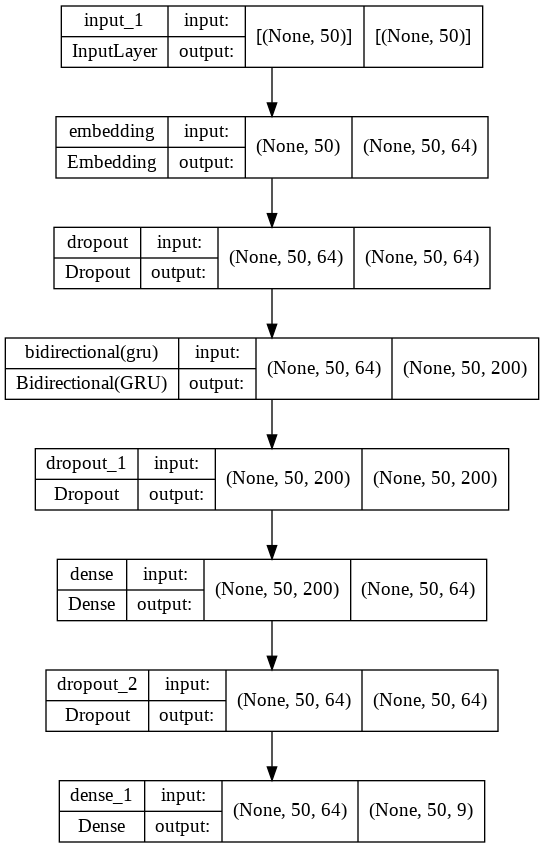

In [ ]:
# Grafički prikaz arhitekture mreže
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=tfa.optimizers.AdamW(learning_rate=lr, weight_decay=wd),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train,
                          y_train,
                          validation_data=(X_val,
                                           y_val), 
                          epochs=5)

Epoch 1/5
439/439 [==============================] - 69s 147ms/step - loss: 0.2370 - accuracy: 0.9502 - val_loss: 0.1849 - val_accuracy: 0.9505
Epoch 2/5
439/439 [==============================] - 46s 105ms/step - loss: 0.1491 - accuracy: 0.9589 - val_loss: 0.1567 - val_accuracy: 0.9577
Epoch 3/5
439/439 [==============================] - 48s 109ms/step - loss: 0.1305 - accuracy: 0.9652 - val_loss: 0.1629 - val_accuracy: 0.9595
Epoch 4/5
439/439 [==============================] - 47s 108ms/step - loss: 0.1180 - accuracy: 0.9677 - val_loss: 0.1516 - val_accuracy: 0.9625
Epoch 5/5
439/439 [==============================] - 49s 111ms/step - loss: 0.1102 - accuracy: 0.9694 - val_loss: 0.1569 - val_accuracy: 0.9623


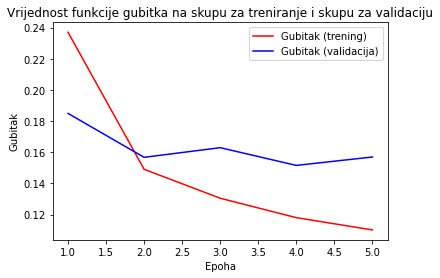

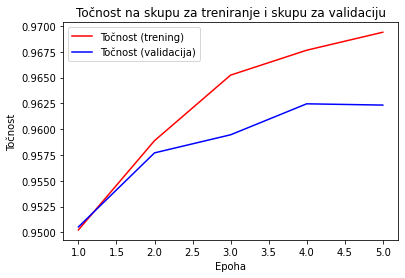

In [ ]:
plot_results(model_history)

# Kreiranje funkcija za detaljnu evaluaciju modela

In [ ]:
# Kreiranje liste sa točnim oznakama
true_labels = []

for sentence in y_val:
  for label in sentence:
    true_labels.append(label)

# Prikaz prvih 10 točnih oznaka u skupu za validaciju
true_labels[:10]

[0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# Predviđanja modela
model_pred_probs = model.predict(X_val)

In [ ]:
# Funkcija koja prima vjerojatnosti (predviđanja modela) i vraća oznake sa najvećom vjerojatnosti
def get_labels_from_probs (pred_probs):
  
  predicted_labels = []

  for sentence in pred_probs:
    for label in sentence:
      predicted_labels.append(np.argmax(label)) # dodaj indeks oznake sa najvećom vjerojatnošću

  return predicted_labels

In [ ]:
predicted_labels = get_labels_from_probs(model_pred_probs)

# Prikaz prvih 10 predviđanja modela u skupu za validaciju
predicted_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Kreirati ćemo funkciju koja prima listu sa točnim oznakama i predviđanja modela (vjerojatnosti), a vraća točnost (*accuracy*), preciznost, recall i F1-score.

Ispod možemo viditi formule za svaku od tih metrika.

<br>

**TP = True Positives** (npr. model je točno predvidio da čovjek ima bolest)  
**TN = True Negatives** (npr. model je točno predvidio da čovjek *nema* bolest)  
**FP = False Positives** (npr. model je predvidio da čovjek ima bolest, a zapravo ju nema)  
**FN = False Negatives** (npr. model je predvidio da čovjek nema bolest, a zapravo ju ima)  

<br>

\begin{align}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}
<br>
\begin{align}
Precision = \frac{TP}{TP + FP}
\end{align}
<br>
\begin{align}
Recall = \frac{TP}{TP + FN}
\end{align}
<br>
\begin{align}
F1 = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}
\end{align}
<br>


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results (y_true, pred_probs):
  
  y_pred = get_labels_from_probs(pred_probs)
  
  accuracy = accuracy_score(y_true, y_pred)

  precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  
  results = {"accuracy": accuracy,
              "precision": precision,
              "recall": recall,
              "f1-score": f1}

  return results

# Primjer korištenja funkcije
model_1_results = calculate_results(true_labels, model_pred_probs)
model_1_results

{'accuracy': 0.9623391812865497,
 'f1-score': 0.9559228446292635,
 'precision': 0.956146902635353,
 'recall': 0.9623391812865497}

Sljedeća funkcija će kreirati detaljno tekstualno izvješće koje prikazuje metrike za svaku od oznaka.

In [ ]:
from sklearn.metrics import classification_report

def class_report (y_true, pred_probs, title):

  y_pred = get_labels_from_probs(pred_probs)

  print(f"\t\t\t-------------------\n\t\t\t{title}\n\t\t\t-------------------\n")
  print(classification_report(y_true, y_pred, target_names=list(idx2label.values())))

# Primjer korištenja funkcije
class_report(true_labels, model_pred_probs, "Rezultati modela")

			-------------------
			Rezultati modela
			-------------------

              precision    recall  f1-score   support

           O       0.97      0.99      0.98    153968
       I-ORG       0.75      0.28      0.41       750
       B-ORG       0.73      0.45      0.55      1340
       B-PER       0.68      0.34      0.45      1793
      I-MISC       0.82      0.11      0.19       339
       B-LOC       0.72      0.52      0.61      1830
      B-MISC       0.71      0.32      0.44       918
       I-PER       0.68      0.34      0.45      1257
       I-LOC       0.75      0.31      0.43       255

    accuracy                           0.96    162450
   macro avg       0.76      0.41      0.50    162450
weighted avg       0.96      0.96      0.96    162450



# Evaluacija na testnom skupu

In [ ]:
model.evaluate(X_test, y_test)

108/108 [==============================] - 2s 20ms/step - loss: 0.1467 - accuracy: 0.9651


[0.146652951836586, 0.9650521278381348]

Na skupu za testiranje dobivamo točnost od oko 96%.

# Predviđanja na primjerima rečenica

Na kraju ćemo kreirati funkciju za predviđanja na našim testnim rečenicama. Moramo dovesti rečenice u isti format na kojem se model trenirao.

In [ ]:
def predict_on_sentence (sentence, model):
  
  sentence_length = len(sentence.split())
  
  # Vektorizacija
  x = text_vectorizer([sentence])
  arr = np.array(x)

  # Predviđanja modela
  preds = get_labels_from_probs(model.predict(arr))

  # Predviđanja u tekstualnom formatu
  text_preds = [idx2label[x] for x in preds]

  # Kreiranje DataFrame-a za vizualizaciju
  dictionary = {"sentence": sentence.split(),
                "predictions": text_preds[:sentence_length]}
  df = pd.DataFrame(dictionary)

  return df.transpose()

In [ ]:
sample_sentences = ["Ann went to the United States",
                    "Charles Michel is the president of the European Council",
                    "China is threatening to invade Taiwan",
                    "Robbie Williams: Fame 'intoxicating but isolating'",
                    "Wimbledon is one of the four Grand Slam tennis tournaments"]

In [ ]:
pred = predict_on_sentence(sample_sentences[0], model)
pred

,0,1,2,3,4,5
sentence,Ann,went,to,the,United,States
predictions,B-PER,O,O,O,B-LOC,I-LOC


# Zaključak

U sklopu ovog projekta čija je tema bila **usporedba alata za označavanje teksta** nastojao sam prikazati praktičan primjer u kodu na koji način se mogu iskoristiti podaci dobiveni takvim alatima. Odabrao sam problem prepoznavanja imenovanih entiteta te kreirao model koji je sposoban do određene mjere u rečenicama prepoznavati imena osoba, geografskih lokacija i organizacija.

# Popis referenci

[Named-Entity Recognition (NER) using Keras Bidirectional LSTM - Towards Data Science](https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54)  
[TensorFlow dokumentacija za AdamW](https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/AdamW)  
[Natural Language Processing - Wikipedia](https://en.wikipedia.org/wiki/Natural_language_processing)  
[Named-entity recognition - Wikipedia](https://en.wikipedia.org/wiki/Named-entity_recognition)  
[Korišteni dataset - CoNLL 2003 English](https://deepai.org/dataset/conll-2003-english)  
[Introduction to the CoNLL-2003 Shared Task: Language-Independent Named Entity Recognition](https://arxiv.org/pdf/cs/0306050v1.pdf)  
[Understanding GRU Networks - Towards Data Science](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)  